Santo Stefano al Celio
============
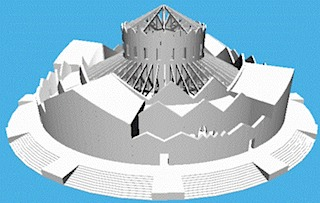

In [1]:
from larlib import *

Evaluating fenvs.py..
...fenvs.py imported in 0.00442 seconds


In [38]:
#1 cubito = 444 mm
r0 = 24.; #cubiti; raggio interno del muro interno
r2 = 48.; #cubiti; raggio esterno del muro medio
r3 = 72.; #cubiti; raggio esterno del muro esterno
r4 = 88.; #cubiti; raggio esterno scale esterne

wsteps = 10.;  #cubiti; profondita' scale esterne
nsteps = 10.;  #numero alzate/pedate scale esterne
wstep = wsteps/nsteps; #cubiti; larghezza pedata
hstep = 1./3; #cubiti; altezza alzata
hw4 = 29.; #cubiti; altezza all'imposta del muro esterno
hbasament = hstep*nsteps;

In [39]:
cylMap = MAP([lambda p: p[1] * sin(p[0]), lambda p: p[1] * cos(p[0]), lambda p: p[2]])

### STAIRS ###

def vdom(h):
    return PROD([COMP([EMBED(1),INTERVALS(PI*3/24)])(3),QUOTE([h])])

def hdom(w):
    return COMP([S(2)(-1), EMBED(1)])(PROD([INTERVALS(PI*3/24)(3), QUOTE([w])]))

def steps(h,w):
    def steps0(n):
        return COMP([STRUCT, CAT, N(n)])([vdom(h), T(3)(h), hdom(w), T(2)(-w)])
    return steps0

stair = RIGHT([(steps(hstep, wstep)(nsteps)),COMP([S(2)(-1), SKEL_2, CUBOID])([PI/24, wsteps, hbasament])])
ramp = cylMap(T(2)(r4)(stair))
stairs = STRUCT(NN(12)([ramp, R([1,2])(PI/6)]))

### BASEMENT ###

basisSector = COMP([cylMap, EMBED(1)])(PROD([INTERVALS(2*PI/12)(4), INTERVALS(r4 - (wstep*(nsteps - 1)))(1)]))
basis = STRUCT(NN(12)([R([1,2])(2*PI/12),basisSector]))
basement = COMP([R([1,2])(PI/-48), STRUCT])([stairs, T(3)(hstep*nsteps), basis])

### FULLEXTWALL ###

ExtWall2DaVerts = [[0,0],[7,0],[7,5],[0,8],[7,3],[9,4],[10.5,1.5],[10.5,0],[11,1.5],[11,3]]
ExtWall2DaCells = [[1,2,3,4],[2,8,7,6,5],[6,7,9,10]]
ExtWall2DaPol = []
#ExtWall2DaInters = PROD([COMP([QUOTE, N(12)])([1]), QUOTE([8])])
#ExtWall2Da = INTERSECTION([MKPOL([ExtWall2DaVerts, ExtWall2DaCells, ExtWall2DaPol]), ExtWall2DaInters])
ExtWall2Da = MKPOL([ExtWall2DaVerts, ExtWall2DaCells, ExtWall2DaPol])
                           
ExtWall2DbVerts = [[0.5,0],[4,0],[5,0],[6,0],[6,3],[5.5,3.5],[5,3],[4.5,3.5],[4,3],[2,4],[0,3],[0,1.5],[0.5,1.5]]
ExtWall2DbCells = [[10,11,12,13],[1,2,9,10,13],[2,3,7,8,9],[3,4,5,6,7]]
ExtWall2DbPol = []
ExtWall2Db = MKPOL([ExtWall2DbVerts, ExtWall2DbCells, ExtWall2DbPol])

ExtWall2D = STRUCT([ExtWall2Da, T(1)(11), ExtWall2Db])
sizxExtWall = SIZE(1)(ExtWall2D)
ExtWall = R([2,3])(PI/2)(PROD([ExtWall2D, QUOTE([1.5])]))
CurvedExtWall = COMP([cylMap, T(2)(r3), S([1,3])([PI/(4*sizxExtWall), hw4/8.])])(ExtWall)
DoubleExtWall = STRUCT([CurvedExtWall, S(1)(-1), CurvedExtWall])
FullExtWall = COMP([STRUCT, NN(4)])([DoubleExtWall, R([1,2])(PI/2)])

### THEMEDCOLUMNS ###

def column(w,h):
    basis = CUBOID([w, w, 2*w/3])
    trunk = CYLINDER([w/2*0.85, h - w])(8)
    capitel = CUBOID([w, w, w/3])
    return TOP([TOP([basis, trunk]), capitel])

hCol = 12
arcAngle = 2*PI/50.4
wallAngle = -3.2*arcAngle/4
RotCross = 3.2*arcAngle/4 + 2.5*arcAngle
MyColumn = T(2)(r2 - 0.75)(column(1.5, hCol))
The4cols = COMP([R([1,2])(arcAngle*0.4/3.2), STRUCT, NN(4)])([R([1,2])(-arcAngle), MyColumn])
The5cols = COMP([R([1,2])(arcAngle*0.4/3.2), STRUCT, NN(5)])([R([1,2])(-arcAngle), MyColumn])
TheBotWall = COMP([cylMap, T(2)(r2 - 0.75), CUBOID])([3.2*arcAngle/4, 1.5, hCol])
TheSecCols = STRUCT([R([1,2])(RotCross),TheBotWall,R([1,2])(wallAngle),
                     The4cols,R([1,2])(-5*arcAngle),TheBotWall,R([1,2])(wallAngle),The5cols])
TheMedColumns = COMP([STRUCT, NN(4)])([TheSecCols, R([1,2])(PI/-2)])

### MEDWALLARCS ###

def bottomArc(d):
    return BEZIER(S1)([[0, 0],[0, 2*d/3],[d, 2*d/3],[d, 0]])

def topArc(d):
    return BEZIER(S1)([[0, 2*d/3],[d, 2*d/3]])

def arc2D(d):
    return BEZIER(S2)([bottomArc(d), topArc(d)])

def arc3D(d,w):
    return COMP([T(2)(w), R([2,3])(PI/2)])(PROD([MAP(arc2D(d))(PROD([INTERVALS(1)(8), INTERVALS(1)(1)])),QUOTE([w])]))

def Interarc(d1,d2,w):
    return CUBOID([d1, w, 2*d2/3])

def Xarc(d1,d2,w):
    return RIGHT([RIGHT([Interarc(d1,d2,w), arc3D(d2,w)]), Interarc(d1,d2,w)])

TheArc = Xarc(0.4,3.2,1.5)
SizeArc = SIZE(1)(TheArc)

def CurvedArc():
    sx = (1/SizeArc)*arcAngle
    sz = sx * (r2 - 2)
    return COMP([cylMap, T(2)(r2 - 0.75), S([1,3])([sx,sz])])(TheArc)

HeigthArc = SIZE(3)(CurvedArc())
The5arcs = COMP([STRUCT, NN(5)])([CurvedArc(), R([1,2])(-arcAngle)])
The6arcs = COMP([STRUCT, NN(6)])([CurvedArc(), R([1,2])(-arcAngle)])
TheMidWall = COMP([cylMap, T(2)(r2 - 0.75), CUBOID])([3.2*arcAngle/4, 1.5, HeigthArc])
TheSector = STRUCT([R([1,2])(RotCross), TheMidWall, R([1,2])(wallAngle),
                   The5arcs, R([1,2])(-5*arcAngle), TheMidWall,
                   R([1,2])(wallAngle), The6arcs])
TheArcs = COMP([STRUCT, NN(4)])([TheSector, R([1,2])(PI/-2)])
TheArcsCols = STRUCT([TheMedColumns, T(3)(hCol), TheArcs])

MedWall2Dverts = [[0,4],[8,4],[17,4],[17,5],[12.5,7.5],[8,5],[0,8]]
MedWall2Dcells = [[1,2,6,7],[2,3,4,5,6]]
MedWall2Dpol = []
MedWall2D = MKPOL([MedWall2Dverts, MedWall2Dcells, MedWall2Dpol])

sizxMedWall = SIZE(1)(MedWall2D)
MedWall = R([2,3])(PI/2)(PROD([MedWall2D, QUOTE([1.5])]))
CurvedMedWall = COMP([cylMap, T(2)(r2 + 0.75), S([1,3])([PI/(4*sizxMedWall), hw4/8.])])(MedWall)
DoubleMedWall = STRUCT([CurvedMedWall, S(1)(-1), CurvedMedWall])
FullMedWall = COMP([STRUCT, NN(4)])([DoubleMedWall, R([1,2])(PI/2)])
MedWallArcs = STRUCT([FullMedWall, TheArcsCols])

### CROSSWALLS ###

CrossWall = COMP([T(1)(-1), R([1,2])(0.2*arcAngle), S(3)(hw4/8), CUBOID])([1.5, r3 - r2, 5])
SingleWall = COMP([R([1,2])(2.5*arcAngle),T(2)(r2)])(CrossWall)
DoubleWall = STRUCT([SingleWall, S(1)(-1), SingleWall])
CrossWalls = COMP([STRUCT, NN(4)])([DoubleWall, R([1,2])(PI/2)])
HalfTetto = MKPOL([[[0,r2,8],[8,r2,5],[8,r3,5],[0,r3,8]],[[1,2,3,4]],[]])
CurvedHalfTetto = COMP([cylMap, S([1,3])([2.5*arcAngle/8, hw4/8])])(HalfTetto)
DoubleHalfTetto = STRUCT([CurvedHalfTetto, S(1)(-1), CurvedHalfTetto])
Tetto = COMP([STRUCT, NN(4)])([DoubleHalfTetto, R([1,2])(PI/-2)])
FullTetto = STRUCT([CrossWalls, Tetto])

### FULLCOURTETTO ###

# TODO

In [34]:
VIEW(CrossWalls)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f2fd2d8c480> >

In [41]:
### AGGR1 ###
aggr1 = STRUCT([basement, T(3)(hbasament), FullExtWall])
VIEW(aggr1)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f2fd3de39f0> >

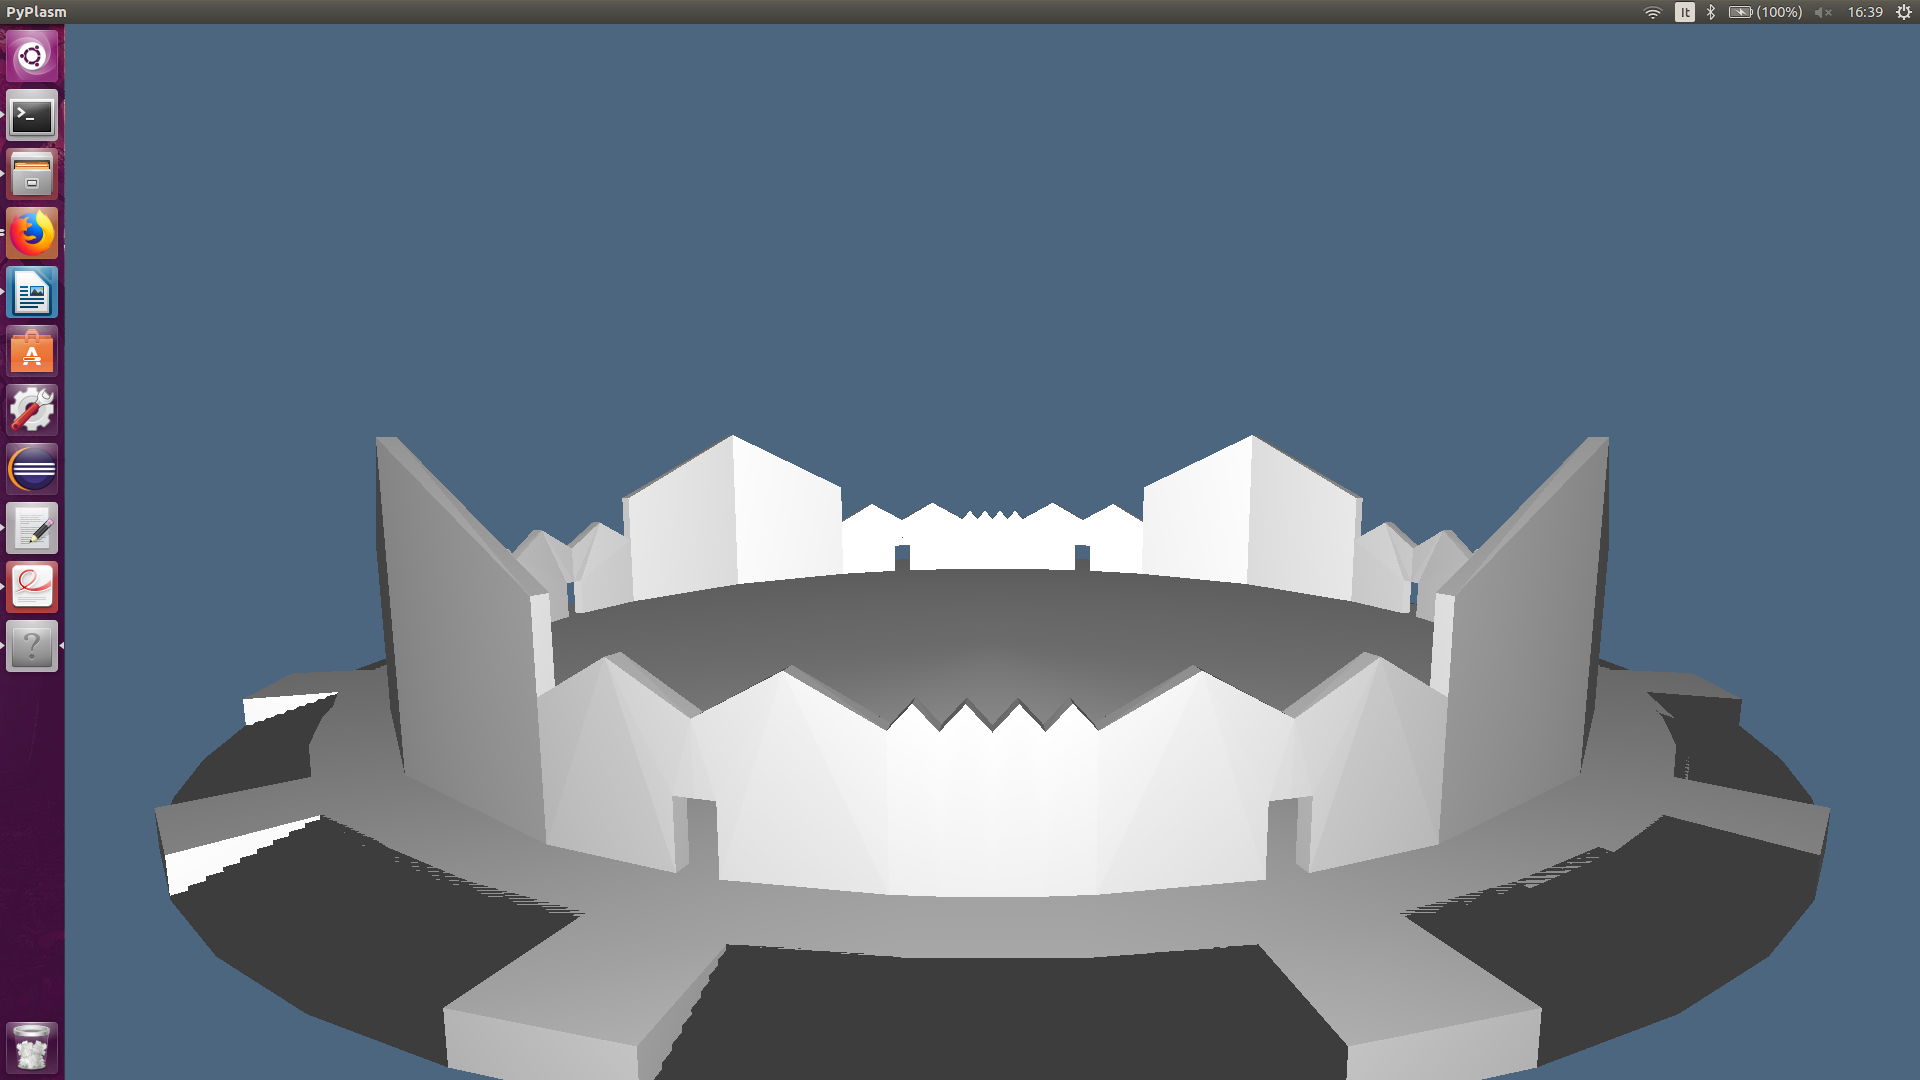

In [42]:
### AGGR2 ###
aggr2 = STRUCT([basement, T(3)(hbasament), FullExtWall, TheMedColumns])
VIEW(aggr2)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f2fd3de37b0> >

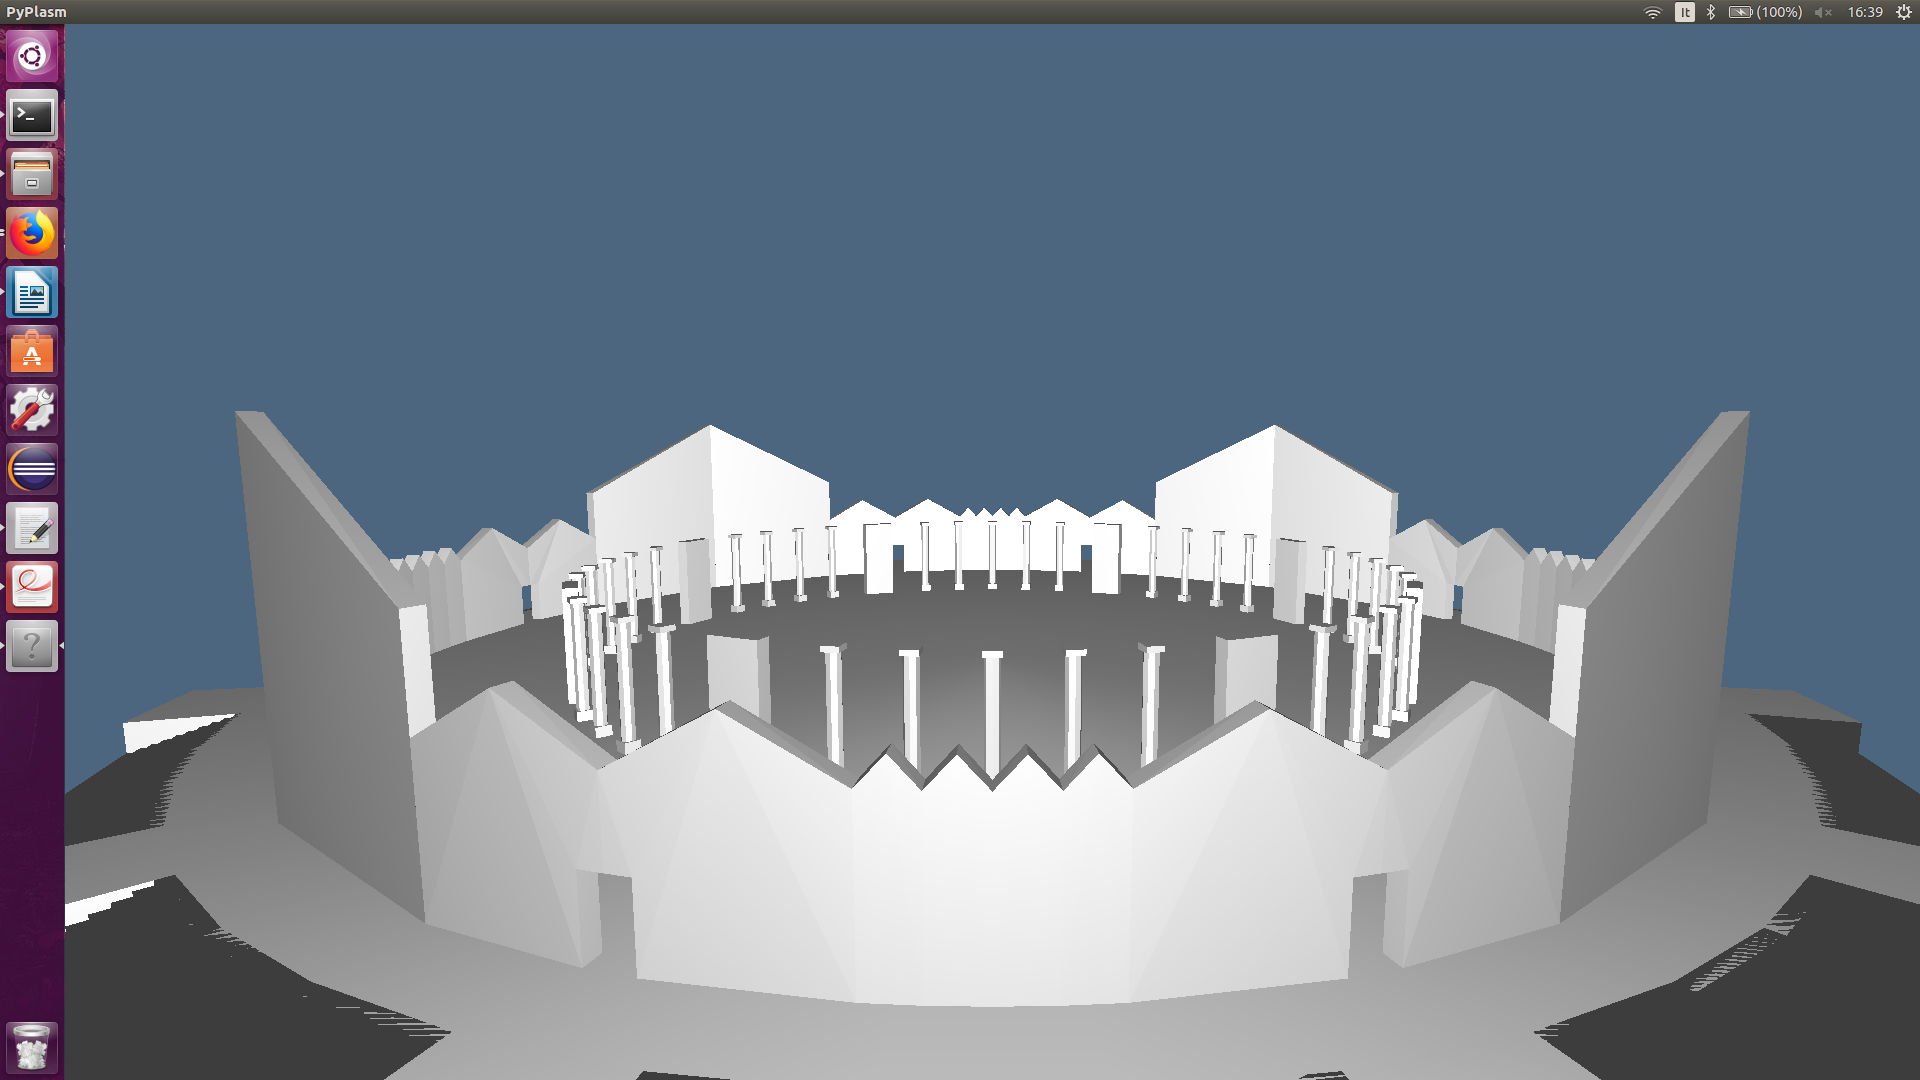

In [22]:
###  AGGR3 ###
aggr3 = STRUCT([basement, T(3)(hbasament), FullExtWall, MedWallArcs])
VIEW(aggr3)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f2fd3ec68a0> >

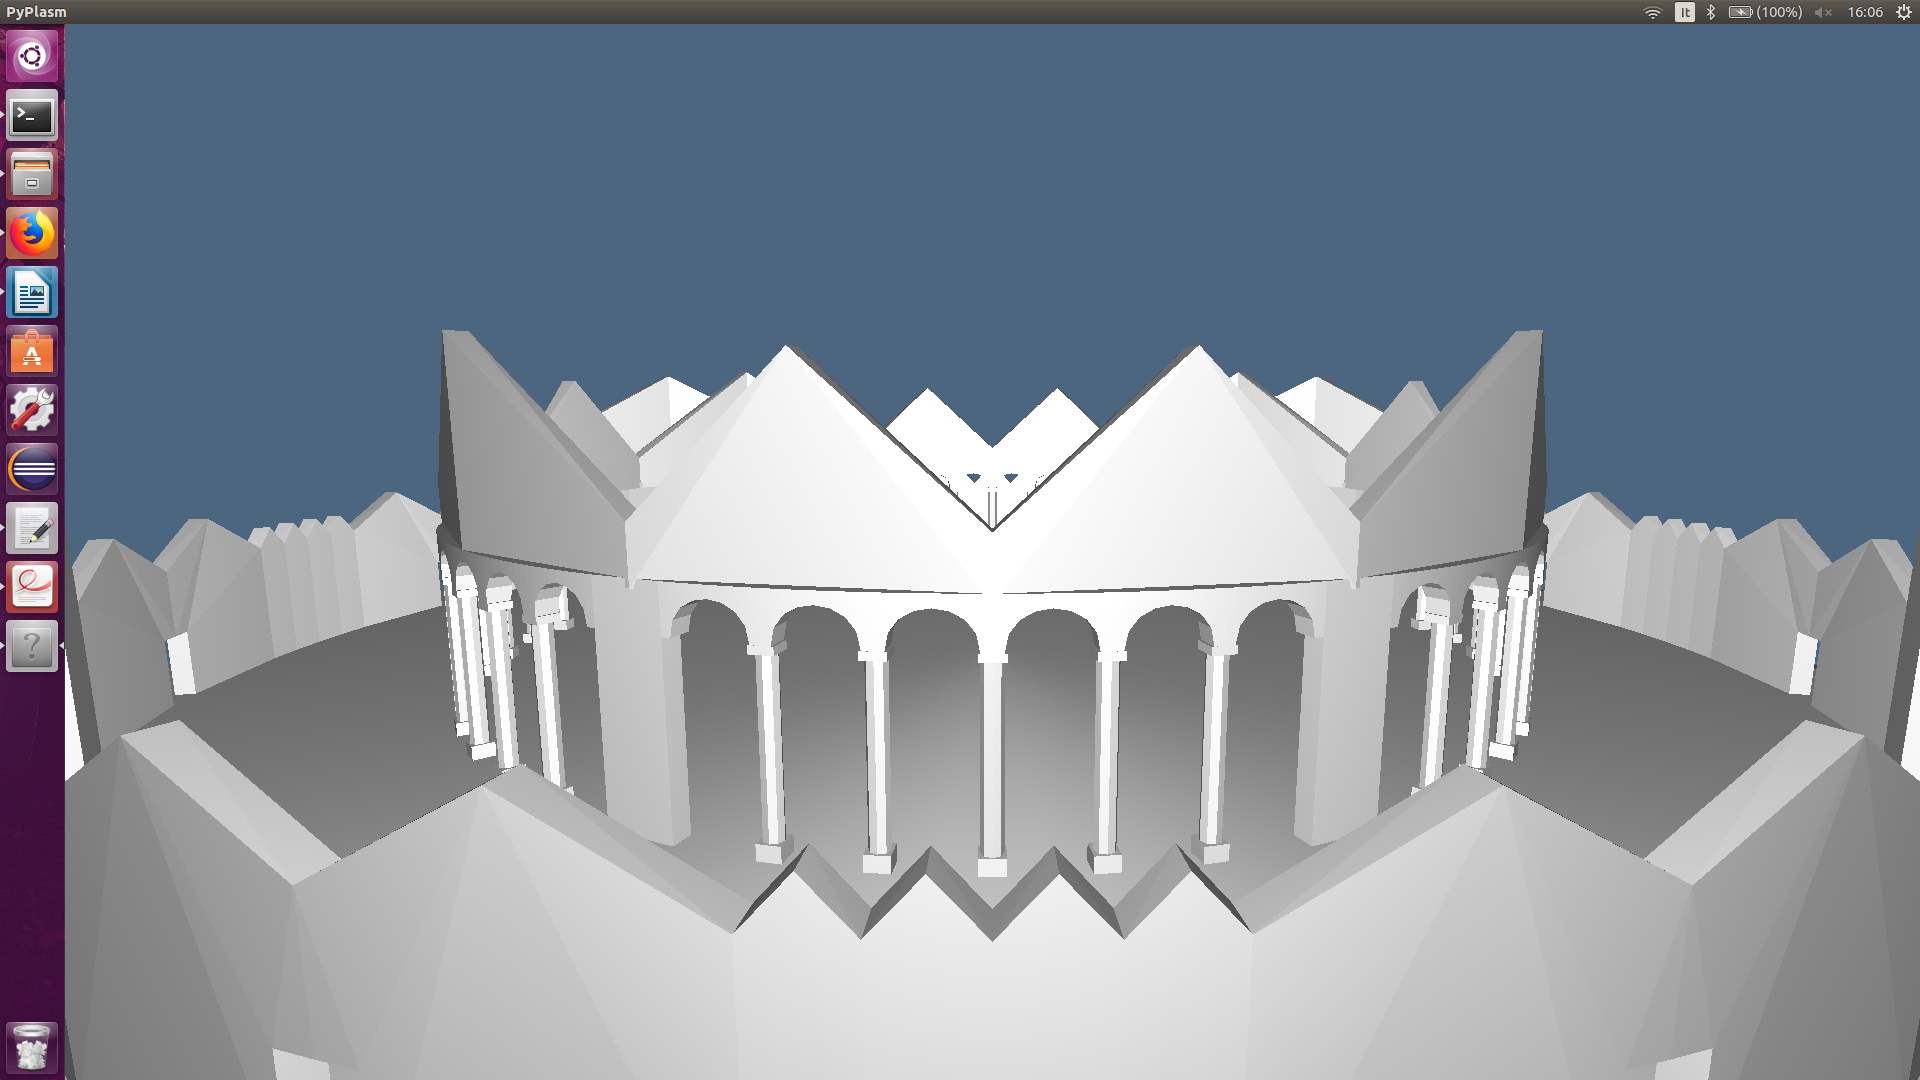

In [40]:
### AGGR4 ####
aggr4 = STRUCT([basement, T(3)(hbasament), FullExtWall, MedWallArcs, FullTetto])
VIEW(aggr4)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7f2fd3de3720> >

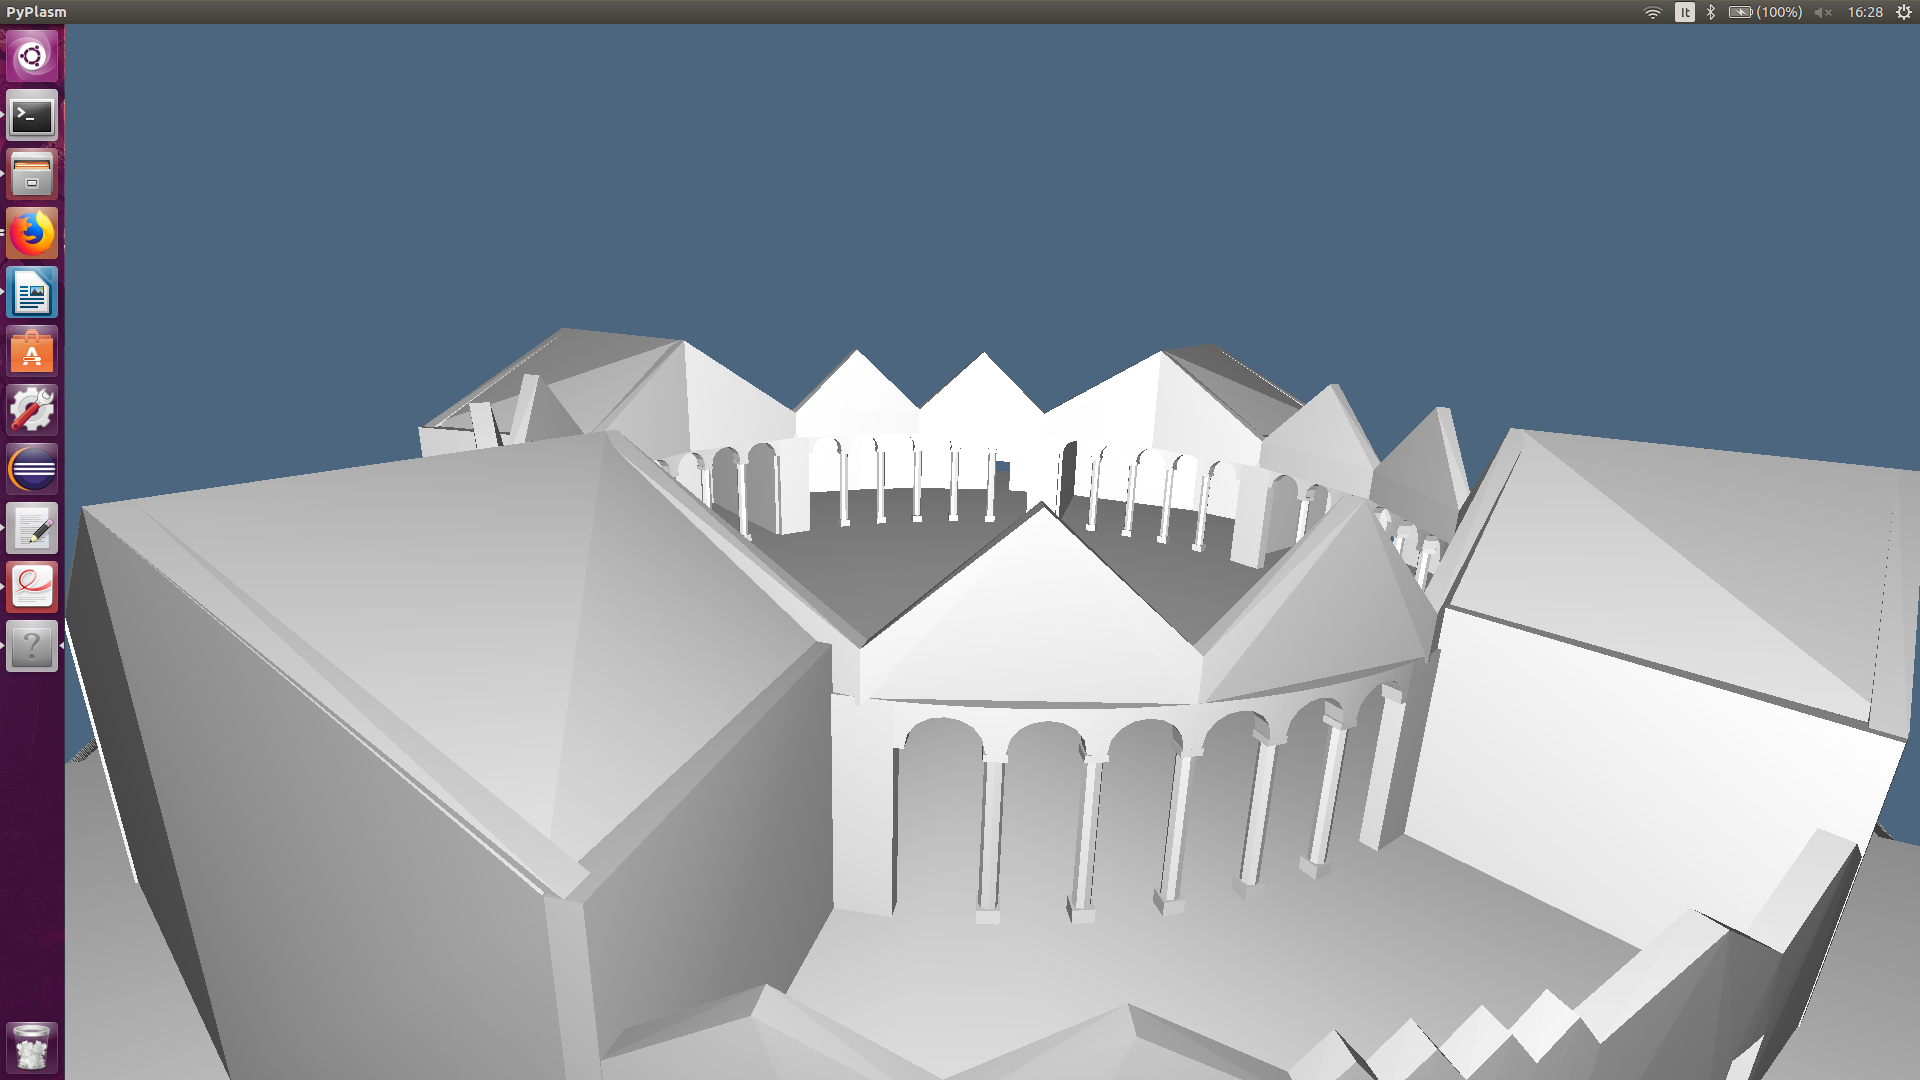